In [44]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [4]:
data = pd.read_csv('Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [ ]:
x = np.array(data[['Hours Studied','Previous Scores', 'Sample Question Papers Practiced']])
y = np.array(data['Performance Index'])

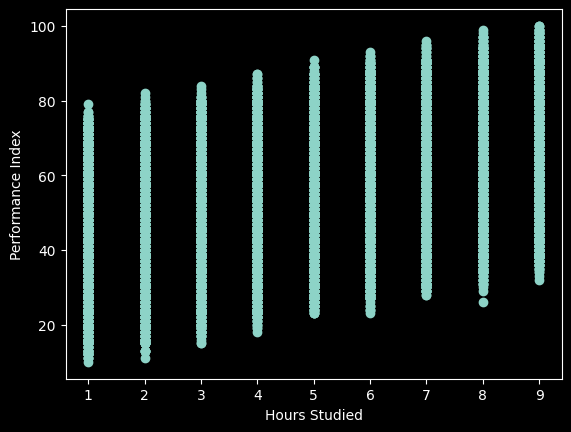

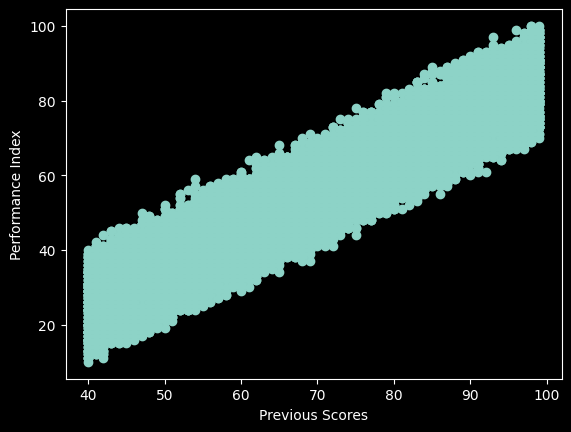

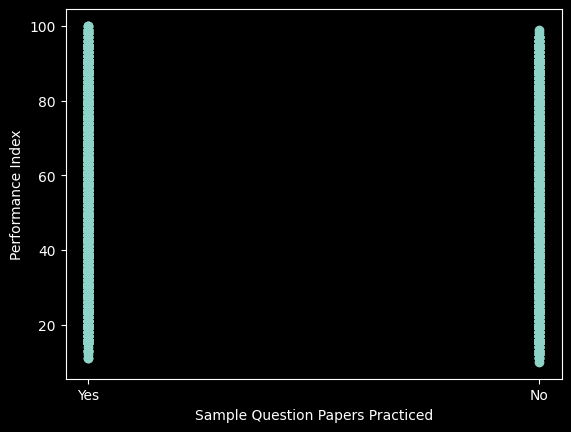

In [23]:
plt.scatter(x[:,0], y)
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

plt.scatter(x[:,1], y)
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()

plt.scatter(x[:,2], y)
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.show()

In [33]:
def NormalEquation():
    x = np.array(data[['Hours Studied','Previous Scores','Sample Question Papers Practiced']])
    y = np.array(data['Performance Index'])
    ones = np.ones(x.shape[0])
    x = np.column_stack((x, ones))
    y = np.array(data['Performance Index'])
    xT = x.transpose()
    x_inv = np.linalg.inv(np.dot(xT, x))
    theta = np.dot(np.dot(x_inv, xT), y)  # Normal Equation
    return theta

In [34]:
def StochasticGradientDescent(lr,theta0,theta1,theta2,theta3):
    for j in range(len(y)):
        x1 = data['Hours Studied'][j]
        x2= data['Previous Scores'][j]
        x3= data['Sample Question Papers Practiced'][j]
        y_i = data['Performance Index'][j]
        hypothesis = theta0+theta1*x1 + theta2*x2 + theta3*x3
        theta0 = theta0 - lr * (hypothesis - y_i)
        theta1 = theta1 - lr * (hypothesis - y_i) * x1
        theta2 = theta2 - lr * (hypothesis - y_i) * x2
        theta3 = theta3 - lr * (hypothesis - y_i) * x3
    return theta0,theta1,theta2,theta3

In [54]:
theta0 = 0
theta1 = 0
theta2 = 0
theta3 = 0
iterations = 750
for i in range(iterations):
    theta0,theta1,theta2,theta3 = StochasticGradientDescent(0.0001,theta0,theta1,theta2,theta3)
    if(i % 50 == 0):
        print("Theta values after", i, "iterations of Gradient Descent: theta0 =", theta0, ", theta1 =", theta1, ", theta2 =", theta2, ", theta3 =", theta3)

Theta values after 0 iterations of Gradient Descent: theta0 = -1.2251041278691561 , theta1 = 1.9095230388510278 , theta2 = 0.7542142842723609 , theta3 = -0.4660338336820201
Theta values after 50 iterations of Gradient Descent: theta0 = -27.151164753725084 , theta1 = 2.741516860416467 , theta2 = 0.9863545024833297 , theta3 = 0.10452227203244921
Theta values after 100 iterations of Gradient Descent: theta0 = -30.242572515943614 , theta1 = 2.840603781405683 , theta2 = 1.0140452269026834 , theta3 = 0.1726348325008749
Theta values after 150 iterations of Gradient Descent: theta0 = -30.611189874688968 , theta1 = 2.8524188384640357 , theta2 = 1.0173470500468043 , theta3 = 0.18075652787995078
Theta values after 200 iterations of Gradient Descent: theta0 = -30.655143557806625 , theta1 = 2.8538276578308936 , theta2 = 1.0177407571925587 , theta3 = 0.18172495331245178
Theta values after 250 iterations of Gradient Descent: theta0 = -30.66038456508413 , theta1 = 2.853995644493911 , theta2 = 1.017787

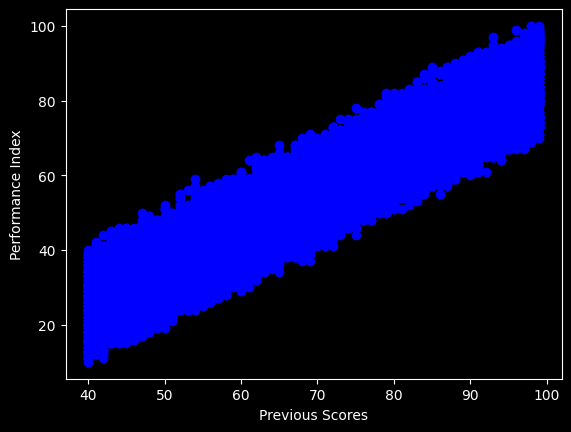

Comparing Stochastic Gradient Descent with Normal Equation
SGD Thetas: [  2.85401839   1.01779406   0.18185606 -30.6610941 ]
Normal Equation Thetas: [  2.85381923   1.01885968   0.1963031  -30.67917405]
Correct Absolute Errors:
Theta0 Error: 0.018079947019995046
Theta1 Error: 0.00019915208320542277
Theta2 Error: 0.001065626119100438
Theta3 Error: 0.014447043664615716


In [ ]:
# Scatter plot (2D)
plt.scatter(data['Previous Scores'], data['Performance Index'], color='blue')
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.show()

print("Comparing Stochastic Gradient Descent with Normal Equation")

print("SGD Thetas:", np.array([theta1, theta2, theta3,theta0]))

ne = NormalEquation()
print("Normal Equation Thetas:", ne)

print("Correct Absolute Errors:")
print("Theta0 Error:", abs(ne[3] - theta0))
print("Theta1 Error:", abs(ne[0] - theta1))
print("Theta2 Error:", abs(ne[1] - theta2))
print("Theta3 Error:", abs(ne[2] - theta3))
    

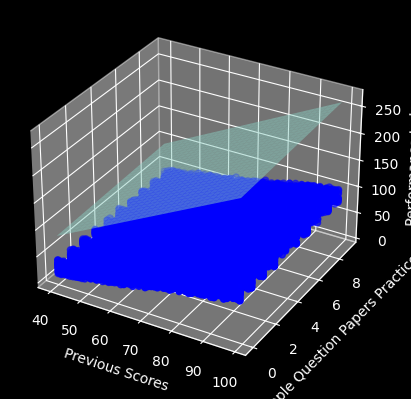

In [57]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

x1 = data['Previous Scores']
x2 = data['Sample Question Papers Practiced']
x3_fixed = data['Hours Studied'].mean()
y  = data['Performance Index']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter points
ax.scatter(x1, x2, y, color='blue')

# Grid
x1_grid, x2_grid = np.meshgrid(
    np.linspace(x1.min(), x1.max(), 30),
    np.linspace(x2.min(), x2.max(), 30)
)

# Regression surface (slice)
y_pred = theta0 + theta1*x1_grid + theta2*x2_grid + theta3*x3_fixed

ax.plot_surface(x1_grid, x2_grid, y_pred, alpha=0.5)

ax.set_xlabel("Previous Scores")
ax.set_ylabel("Sample Question Papers Practiced")
ax.set_zlabel("Performance Index")

plt.show()
